In [32]:
# Importing required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


# Importing the dataset
data = pd.read_csv('vgsales.csv')

In [33]:
# Viewing the dataset
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [34]:
# Checking for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [35]:
# Dropping missing values
data.dropna(inplace=True)

In [36]:
# Checking for missing values again
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


In [37]:
# Cleaning 'Year' column by converting values to integers
data['Year'] = data['Year'].astype(int)

data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [38]:
# Countting unique values in 'Genre' column
num_unique_genres = data['Genre'].nunique()
print("Unique values in 'Genre' column:", num_unique_genres)

# Count unique values in 'Platform' column
num_unique_platforms = data['Platform'].nunique()
print("Unique values in 'Platform' column:", num_unique_platforms)

# Count unique values in 'Publisher' column
num_unique_publishers = data['Publisher'].nunique()
print("Unique values in 'Publisher' column:", num_unique_publishers)


Unique values in 'Genre' column: 12
Unique values in 'Platform' column: 31
Unique values in 'Publisher' column: 576


In [39]:
# Create a new DataFrame with relevant columns
relevant_columns = ['Platform', 'Genre', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
relevant_data = data[relevant_columns]

# Encode categorical variables ('Genre' and 'Platform')
label_encoder = LabelEncoder()
relevant_data.loc[:, 'Genre'] = label_encoder.fit_transform(relevant_data['Genre'])
relevant_data.loc[:, 'Platform'] = label_encoder.fit_transform(relevant_data['Platform'])

# Split the dataset into features and target variable
X = relevant_data.drop(columns=['Global_Sales'])
y = relevant_data['Global_Sales']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

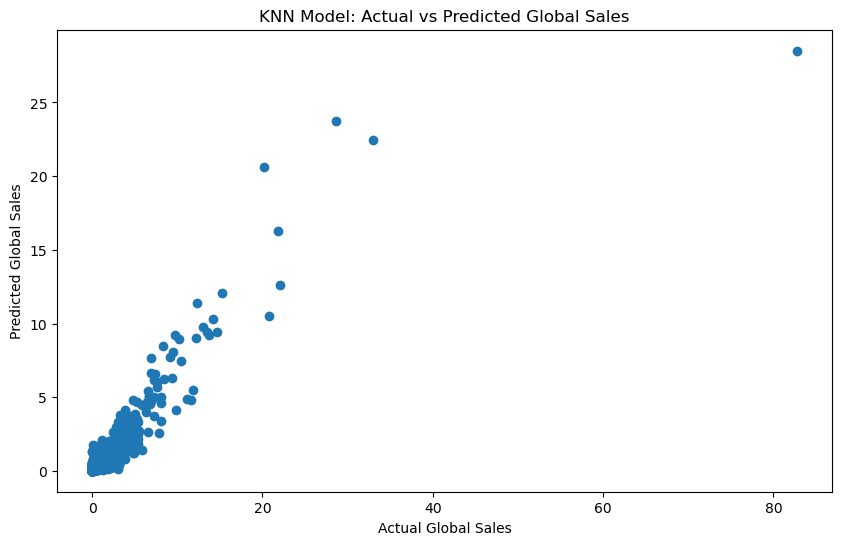

KNN Model Evaluation:
Mean Squared Error: 0.9151094247135841
R-squared: 0.7266117258208441


In [40]:
# Train the KNN model
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

# Evaluate the KNN model
y_pred_knn = knn_model.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Visualize the results for KNN model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn)
plt.xlabel('Actual Global Sales')
plt.ylabel('Predicted Global Sales')
plt.title('KNN Model: Actual vs Predicted Global Sales')
plt.show()

# Print evaluation metrics for KNN model
print("KNN Model Evaluation:")
print("Mean Squared Error:", mse_knn)
print("R-squared:", r2_knn)


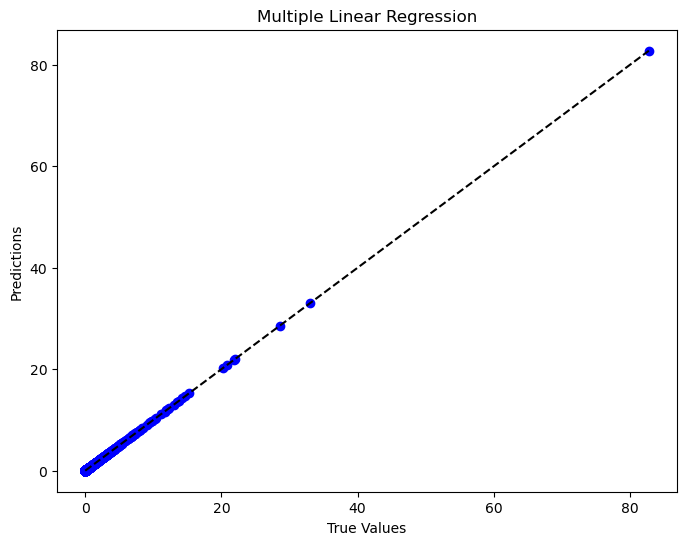

Linear Regression Model Evaluation:
Mean Squared Error: 2.8430641963326753e-05
R-squared: 0.9999915063664189


In [41]:
# Train the model
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

# Evaluate the model
y_pred_linear = linear_regression.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Multiple Linear Regression')
plt.show()

# Print evaluation metrics
print("Linear Regression Model Evaluation:")
print("Mean Squared Error:", mse_linear)
print("R-squared:", r2_linear)


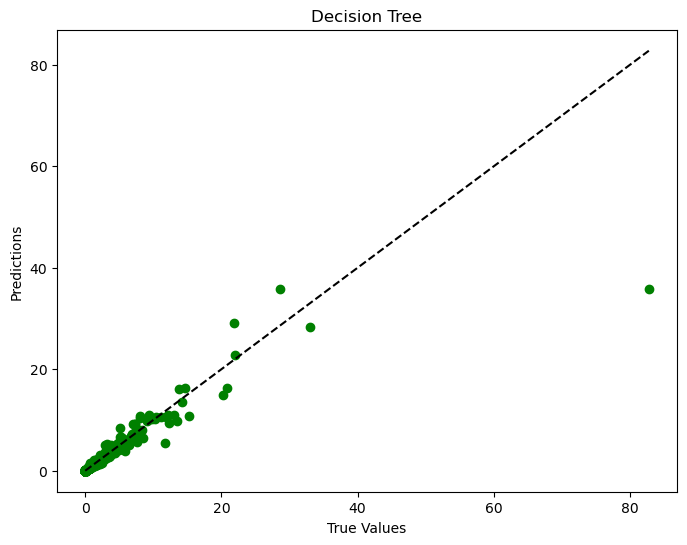

Decision Tree Model Evaluation:
Mean Squared Error: 0.5278775602098108
R-squared: 0.842296963328913


In [42]:
# Train the model
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)

# Evaluate the model
y_pred_dt = decision_tree.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dt, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Decision Tree')
plt.show()

# Print evaluation metrics
print("Decision Tree Model Evaluation:")
print("Mean Squared Error:", mse_dt)
print("R-squared:", r2_dt)


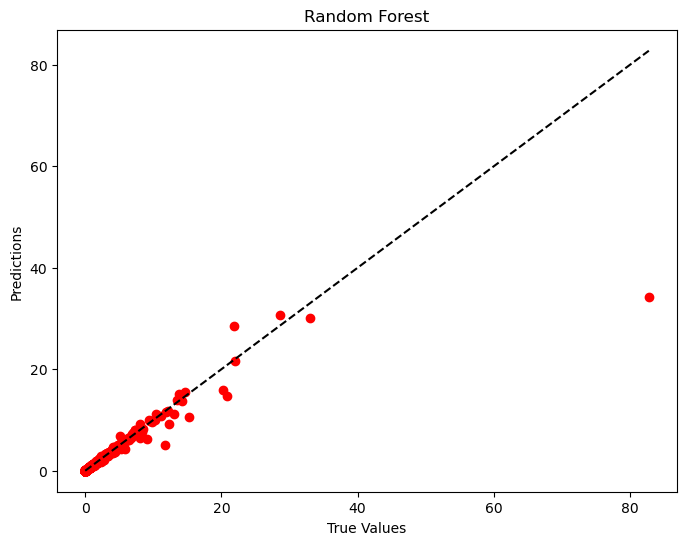

Random Forest Model Evaluation:
Mean Squared Error: 0.5267308766668812
R-squared: 0.8426395342022589


In [43]:
# Train the model
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

# Evaluate the model
y_pred_rf = random_forest.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Random Forest')
plt.show()

# Print evaluation metrics
print("Random Forest Model Evaluation:")
print("Mean Squared Error:", mse_rf)
print("R-squared:", r2_rf)


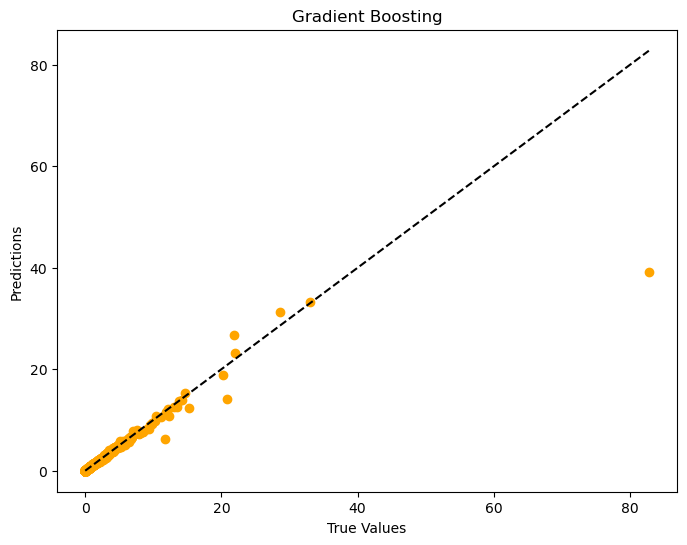

Gradient Boosting Model Evaluation:
Mean Squared Error: 0.41588677539931623
R-squared: 0.8757541287306277


In [44]:
# Train the model
gradient_boosting = GradientBoostingRegressor()
gradient_boosting.fit(X_train, y_train)

# Evaluate the model
y_pred_gb = gradient_boosting.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gb, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Gradient Boosting')
plt.show()

# Print evaluation metrics
print("Gradient Boosting Model Evaluation:")
print("Mean Squared Error:", mse_gb)
print("R-squared:", r2_gb)


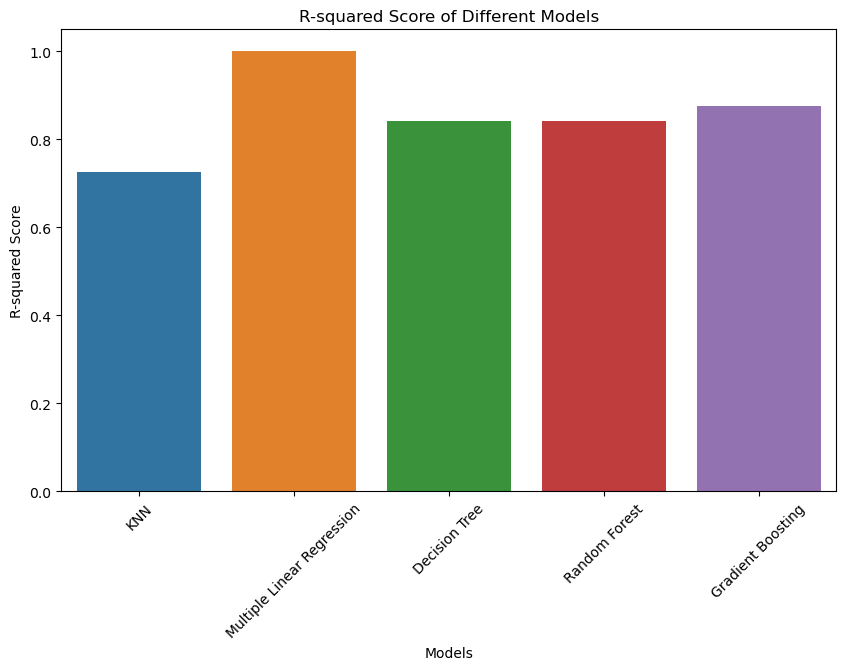

In [45]:
# Create a DataFrame for results
results_df = pd.DataFrame({
    'Model': ['KNN', 'Multiple Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'Mean Squared Error': [mse_knn, mse_linear, mse_dt, mse_rf, mse_gb],
    'R-squared': [r2_knn, r2_linear, r2_dt, r2_rf, r2_gb]
})

# Visualize the results
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='R-squared')
plt.title('R-squared Score of Different Models')
plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.xticks(rotation=45)
plt.show()
